# **Lab 5: Differential Equations**
**Christian Weigelt**

#***About the code*** 

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Christian Weigelt (weigelt@kth.se)

# This file is part of the course DD2363 DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Abstract**

This lab consisted of implementing a set of time stepping algorithms for differential equations.
  
  Test code was written to verify function outputs.
  
  In the introduction section, the function is given a brief description, both of input/output, and what is to be tested.
  
  In the method section, short definitions of the functions are given, and their implementations are presented.
  
  In the results section, the test cases and their output are presented.

# **Set up environment**

In [2]:
import numpy as np
from numpy import random as rng
import math
from scipy import optimize, integrate
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes

# **Introduction**
In chapter 13.2 in the course book, we are presented with a few different methods to solve Initial Value Problems (IVPs). Here we will solve IVPs successive approximations $U(t_n)$ that are computed on partitions (time steps) $I_n=[t_{n-1},t_n]$ of an interval $[0, T]$, most often interpreted as an interval of time. By doing this we can construct an approximation of $U(t)$ for any $t \in [0, T]$.

To compute the solution at $t=t_n$, we can use a forward difference approximation of the derivative at $t=t_{n-1}$:

  $\dot{u} (t_{n-1}) ≈ \frac{u(t_n) - u(t_{n-1})}{k_n}$

  which gives us:

  $u(t_n) ≈ u(t_{n-1}) + k_n\dot{u}(t_{n-1} = k_n f(u(t_{n-1}, t_{n-1})$

  This is the forward Euler method for successive approximation of $U_n = U(t_n)$, given by the update formula

  $U_n = U_{n-1} + k_nf(U_{n-1},t_{n-1})$

  If the we assume that the function 

In this lab, the assignment was to implement two functions, with input and output as defined in the lab instructions, as well as write code tests to test output.

1. Function: Time stepping for scalar initial value problem $\frac{du}{dt} = f(u,t)$

  Input: final time $T$, function $f(u,t)$, initial value $u(0)$
  
  Output: approximation $U(t_n)$ for the time interval $[0,T] $
  
  Test: verify accuracy and stability with respect to model problem.

2. Function: Time stepping for a system of  initial value problems $\frac{du}{dt} = f(u,t)$

  Input: final time $T$, function $f(u,t)$, initial value $u(0)$

  Output: approximation $U(t_n)$ for the time interval $[0,T]$
  
  Test: verify accuracy and stability with respect to model problem.  

# **Method**

Here the code for the assignment is provided.

###Time stepping for scalar initial value problem $\frac{du}{dt} = f(u,t)$
  Function 1 is 'Time stepping for scalar initial value problem $\frac{du}{dt} = f(u,t)$'.

  Use theta method as presented in Algorithm 13.3, with $θ=0.5$ to use the trapezoidal method. Since the trapezoidal method also works for systems of IVPs, this implementation can be used for both assignments.

  Use newton's method implementation from 'scipy.optimize'

In [3]:
def theta_method(f, u_0, t_0, T, k, theta=0.5):
  t = t_0
  t_s = [t_0]
  u = [u_0]
  while t < T:
    u.append(optimize.newton(lambda x: x - u[-1] - k*((1-theta)*f(x) + theta*f(u[-1])), u[-1]))
    t += k
    t_s.append(t)
  return u, t_s

###Time stepping for a system of  initial value problems $du/dt = f(u,t)$
  Function 1 is 'Time stepping for a system of  initial value problems $du/dt = f(u,t)$'.

  As mentioned above, the above implementation will be used for this problem as well.

# **Results**

####Scalar IVP, accuracy
For a scalar IVP

  $\dot{u} = f(u(t), t), 0 < t ≤ T,$

  $u(0) = u_0$

with $f(u(t), t) = αu(t)$, and initial condition $u(0) = 1$, the exact solution is the exponential function $u(t) = exp(\alpha t)$, for all $α \in R$ and $t > 0$

With $α < 0$, $f(u(t), t) = αu(t)$ is constantly diminishing towards 0, which lets us study its accuracy:

alpha = -6.348446767940064
final error at k=0.5: 1.3125353532527804e-13
final error at k=0.25: 2.685628890888335e-28
final error at k=0.125: 2.6183328920969792e-28
final error at k=0.0625: 1.541322747414892e-28


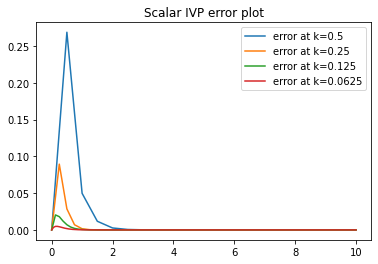

In [26]:
#def test_scalar_IVP_accuracy():
T = 10
t_0 = 0
K = [0.5, 0.25, 0.125, 0.0625]
U = 1
alpha = -1 * 10 * np.random.uniform() # random alpha
print(f"alpha = {alpha}")
f = lambda u: alpha*u
ex_sol = lambda t: np.exp(alpha*t)

plt.title("Scalar IVP error plot")
for i in range(len(K)):
  solutions, t_s = theta_method(f, U, t_0, T, K[i], theta=0.5)
  exact = [ex_sol(t) for t in t_s]
  error = [abs(exact[i] - solutions[i]) for i in range(len(t_s))]
  plt.plot(t_s, error, label=f"error at k={K[i]}")
  print(f"final error at k={K[i]}: {error[-1]}")

#plt.plot(x_axes[-1], exact, label=f"exact solution u(t)=exp(αt)")
plt.legend()
plt.show()

As we approach $T$ we see the error of the approximation decrease to a very small value, showing that the approximation has good accuracy.

####Scalar IVP, stability
For the homogenous model problem 

$\dot{u}(t) + λu(t) = 0, u(0)=u_0$

there is one equlibrium point

$u^* = 0$, which we choose as initial condition $u_0 = u^*$

Introducing a problem with perturbed initial condition $u^* + ϵ$ and solution $v(t)$ lets us study the propagation of the perturbation $𝜑(t) = v(t) - u(t)$ by the perturbation equation

$\dot{𝜑}(t) + λ𝜑(t) = 0, 𝜑(0)=ϵ$

with solution

$𝜑(t) = exp(-λt)ϵ$

lambda = 1


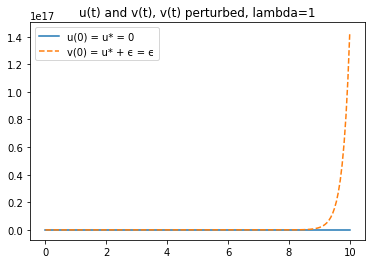

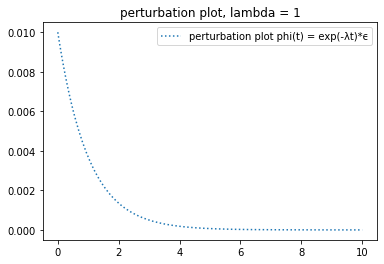

lambda = -1


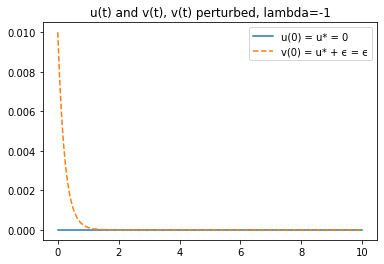

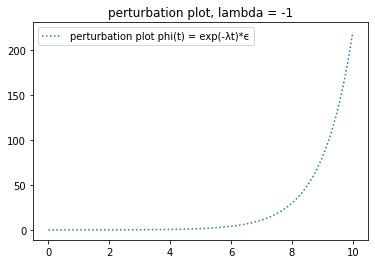

lambda = 0


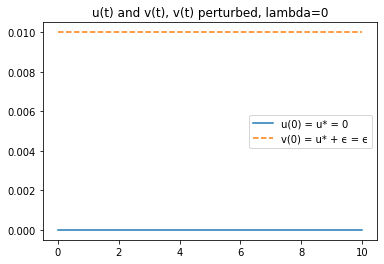

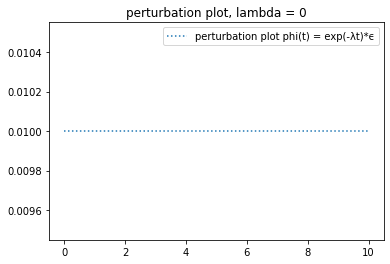

In [24]:
#def test_scalar_IVP_stability():
T = 10
t_0 = 0
K = 0.0625
U = 0
alpha = 10 * np.random.uniform()
epsilon = 1e-2
lambdas = [1, -1, 0]

for lam in lambdas:
  print(f"lambda = {lam}")
  plt.title(f"u(t) and v(t), v(t) perturbed, lambda={lam}")
  f = lambda u: u * lam * alpha
  model, t_s = theta_method(f, U, t_0, T, K, theta=0.5)
  plt.plot(t_s, model, label="u(0) = u* = 0")

  perturbed, t_s = theta_method(f, U + epsilon, t_0, T, K, theta=0.5)
  plt.plot(t_s, perturbed, label="v(0) = u* + ϵ = ϵ", linestyle='dashed')
  plt.legend()
  plt.show()

  plt.title(f"perturbation plot, lambda = {lam}")
  perturbation = [np.exp(-lam*t)*epsilon for t in t_s]
  plt.plot(t_s, perturbation, label="perturbation plot phi(t) = exp(-λt)*ϵ", linestyle='dotted')

  plt.legend()
  plt.show()




The IVP seems to show expected stability, where the equilibrium point $u^* = 0$ is stable if $λ > 0$, unstable if $λ > 0$, and if $λ = 0$, $u^* = ϵ$ is a new equilibrium point.

For system IVP I did not manage to produce test cases yet.

In [ ]:
def test_system_IVP():
  #TODO

# **Discussion**

I was at a bit of a loss when I started on this weeks assignment, as I was not very certain of how I should test the rather straightforward implementation.

Formulating the test cases and what was to be shown was also a challenge, to the point that I did not manage to finish the second assignment function tests.